# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)

# Create validation set and define validation dataloader
val_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)


# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50892437.01it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1734896.72it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13625734.44it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1590327.14it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Normalization is used as our preprocessing to convert our dataset into tensors.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [4]:
# Explore data

# Image shape
print(train_set.data.shape)
print(val_set.data.shape)
print(test_set.data.shape)

# Image data type
print(train_set.data.dtype)
print(val_set.data.dtype)
print(test_set.data.dtype)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([10000, 28, 28])
torch.uint8
torch.uint8
torch.uint8


5


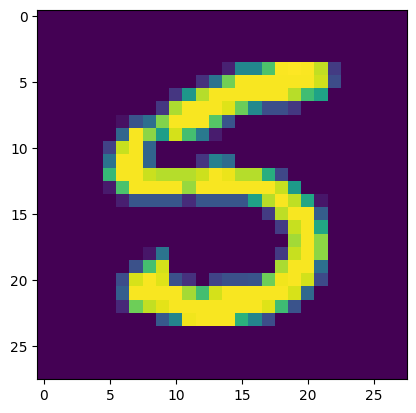

9


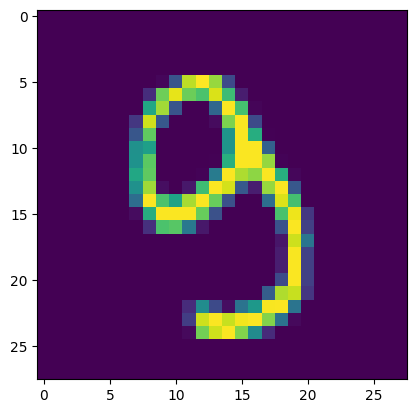

2


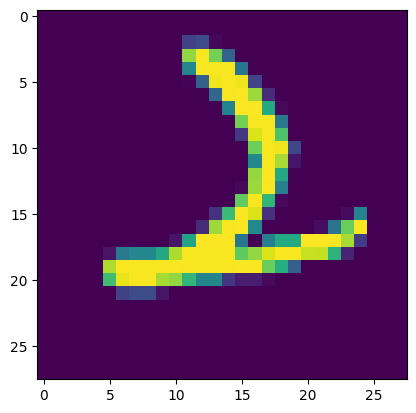

7


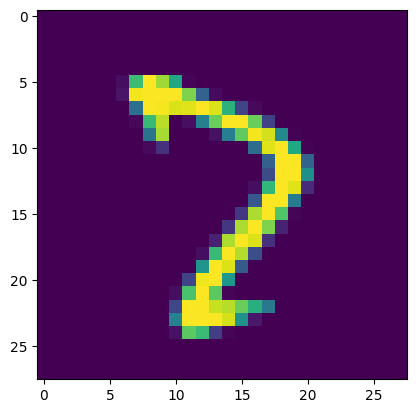

1


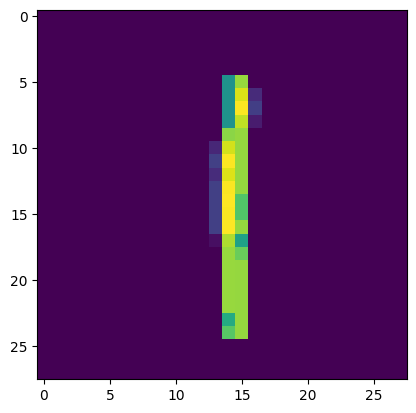

In [5]:
# View images
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu # activation
        # define layers
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # flatten
        x = torch.flatten(x, 1)
        # feed forward
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# Instanstiate model
net = Net()

# Optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
# Epoch size
num_epochs = 10

# List for loss history
train_loss_history = list()
val_loss_history = list()

# Training loop
for epoch in range(num_epochs):
  net.train()
  train_loss = 0.0
  train_correct = 0

  # Print loss during each epoch
  for i, data in enumerate(train_loader):
    inputs, labels = data

    optimizer.zero_grad() # zero out gradients of optimizer
    outputs = net(inputs) # get output of model
    loss = criterion(outputs, labels) # compute loss

    loss.backward() # backward method to compute gradient loss
    optimizer.step() # update parameters

    # Compute accuracy and print accuracy and loss
    _, predicted = torch.max(outputs.data, 1)
    train_correct += (predicted == labels).sum().item()
    train_loss += loss.item()

  train_accuracy = train_correct / len(train_loader.dataset) * 100
  train_avg_loss = train_loss / len(train_loader)

  print(f"Epoch {epoch+1} Training accuracy: {train_accuracy:.2f}% Training loss: {train_avg_loss:.5f}")

  train_loss_history.append(train_avg_loss)


  # Validation loop
  val_loss = 0.0
  val_correct = 0
  net.eval()
  accuracy = 0

  for inputs, labels in val_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = net(inputs) # get output of model
    loss = criterion(outputs, labels) # compute loss

    # Compute accuracy and print accuracy and loss
    _, predicted = torch.max(outputs.data, 1)
    val_correct += (predicted == labels).sum().item()
    val_loss += loss.item()

  val_accuracy = val_correct / len(val_loader.dataset) * 100
  val_avg_loss = val_loss / len(val_loader)

  print(f"Epoch {epoch+1} Validation accuracy: {val_accuracy:.2f}% Validation loss: {val_avg_loss:.5f}")

  val_loss_history.append(val_avg_loss)


Epoch 1 Training accuracy: 97.98% Training loss: 0.06293
Epoch 1 Validation accuracy: 98.36% Validation loss: 0.05098
Epoch 2 Training accuracy: 98.12% Training loss: 0.05881
Epoch 2 Validation accuracy: 98.08% Validation loss: 0.05794
Epoch 3 Training accuracy: 98.31% Training loss: 0.05097
Epoch 3 Validation accuracy: 98.81% Validation loss: 0.03733
Epoch 4 Training accuracy: 98.39% Training loss: 0.04837
Epoch 4 Validation accuracy: 98.58% Validation loss: 0.04292
Epoch 5 Training accuracy: 98.63% Training loss: 0.04304
Epoch 5 Validation accuracy: 98.82% Validation loss: 0.03680
Epoch 6 Training accuracy: 98.70% Training loss: 0.03866
Epoch 6 Validation accuracy: 98.84% Validation loss: 0.03419
Epoch 7 Training accuracy: 98.68% Training loss: 0.03909
Epoch 7 Validation accuracy: 99.02% Validation loss: 0.02940
Epoch 8 Training accuracy: 98.78% Training loss: 0.03628
Epoch 8 Validation accuracy: 99.14% Validation loss: 0.02690
Epoch 9 Training accuracy: 98.91% Training loss: 0.03193

Plot the training loss (and validation loss/accuracy, if recorded).

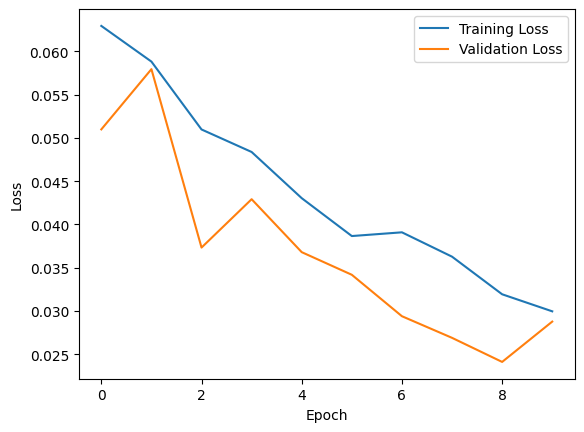

In [16]:
# Plot training and validation loss history
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
test_loss = 0
test_correct = 0

for i, data in enumerate(test_loader):
  inputs, labels = data

  optimizer.zero_grad() # zero out gradients of optimizer
  outputs = net(inputs) # get output of model
  loss = criterion(outputs, labels) # compute loss

  loss.backward() # backward method to compute gradient loss
  optimizer.step() # update parameters

  # Compute accuracy and print accuracy and loss
  _, predicted = torch.max(outputs.data, 1)
  test_correct += (predicted == labels).sum().item()
  test_loss += loss.item()

test_accuracy = test_correct / len(test_loader.dataset) * 100
test_avg_loss = test_loss / len(test_loader)

print(f"Test accuracy: {test_accuracy:.2f}% Test loss: {test_avg_loss:.5f}")

Test accuracy: 96.66% Test loss: 0.11904


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [18]:
## YOUR CODE HERE ##
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu # activation
        # define layers
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2) # dropout

    def forward(self, x):
        # flatten
        x = torch.flatten(x, 1)
        # feed forward
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instanstiate model
net = Net2()

# Optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Loss function
criterion = nn.CrossEntropyLoss()

In [19]:
# Epoch size
num_epochs = 10

# List for loss history
train_loss_history = list()
val_loss_history = list()

# Training loop
for epoch in range(num_epochs):
  net.train()
  train_loss = 0.0
  train_correct = 0

  # Print loss during each epoch
  for i, data in enumerate(train_loader):
    inputs, labels = data

    optimizer.zero_grad() # zero out gradients of optimizer
    outputs = net(inputs) # get output of model
    loss = criterion(outputs, labels) # compute loss

    loss.backward() # backward method to compute gradient loss
    optimizer.step() # update parameters

    # Compute accuracy and print accuracy and loss
    _, predicted = torch.max(outputs.data, 1)
    train_correct += (predicted == labels).sum().item()
    train_loss += loss.item()

  train_accuracy = train_correct / len(train_loader.dataset) * 100
  train_avg_loss = train_loss / len(train_loader)

  print(f"Epoch {epoch+1} Training accuracy: {train_accuracy:.2f}% Training loss: {train_avg_loss:.5f}")

  train_loss_history.append(train_avg_loss)

  # Validation loop
  val_loss = 0.0
  val_correct = 0
  net.eval()

  for inputs, labels in val_loader:

    outputs = net(inputs) # get output of model
    loss = criterion(outputs, labels) # compute loss

    # Compute accuracy and print accuracy and loss
    _, predicted = torch.max(outputs.data, 1)
    val_correct += (predicted == labels).sum().item()
    val_loss += loss.item()

  val_accuracy = val_correct / len(val_loader.dataset) * 100
  val_avg_loss = val_loss / len(val_loader)

  print(f"Epoch {epoch+1} Validation accuracy: {val_accuracy:.2f}% Validation loss: {val_avg_loss:.5f}")

  val_loss_history.append(val_avg_loss)


Epoch 1 Training accuracy: 84.76% Training loss: 0.50059
Epoch 1 Validation accuracy: 92.82% Validation loss: 0.23548
Epoch 2 Training accuracy: 92.80% Training loss: 0.23529
Epoch 2 Validation accuracy: 95.23% Validation loss: 0.15465
Epoch 3 Training accuracy: 94.26% Training loss: 0.18636
Epoch 3 Validation accuracy: 95.63% Validation loss: 0.13764
Epoch 4 Training accuracy: 95.19% Training loss: 0.15862
Epoch 4 Validation accuracy: 96.71% Validation loss: 0.11067
Epoch 5 Training accuracy: 95.54% Training loss: 0.14490
Epoch 5 Validation accuracy: 96.75% Validation loss: 0.10470
Epoch 6 Training accuracy: 95.90% Training loss: 0.13010
Epoch 6 Validation accuracy: 97.19% Validation loss: 0.08920
Epoch 7 Training accuracy: 96.19% Training loss: 0.12025
Epoch 7 Validation accuracy: 97.72% Validation loss: 0.07220
Epoch 8 Training accuracy: 96.38% Training loss: 0.11385
Epoch 8 Validation accuracy: 97.90% Validation loss: 0.06608
Epoch 9 Training accuracy: 96.55% Training loss: 0.10932

In [20]:
test_loss = 0
test_correct = 0

for i, data in enumerate(test_loader):
  inputs, labels = data

  optimizer.zero_grad() # zero out gradients of optimizer
  outputs = net(inputs) # get output of model
  loss = criterion(outputs, labels) # compute loss

  loss.backward() # backward method to compute gradient loss
  optimizer.step() # update parameters

  # Compute accuracy and print accuracy and loss
  _, predicted = torch.max(outputs.data, 1)
  test_correct += (predicted == labels).sum().item()
  test_loss += loss.item()

test_accuracy = test_correct / len(test_loader.dataset) * 100
test_avg_loss = test_loss / len(test_loader)

print(f"Test accuracy: {test_accuracy:.2f}% Test loss: {test_avg_loss:.5f}")

Test accuracy: 97.01% Test loss: 0.09813


## Saving your model
Using `torch.save`, save your model for future loading.

In [21]:
torch.save(Net, "Net.pth")
torch.save(Net2, "Net2.pth")